# Домашнее задание 3 по теме:
# «Нелинейная регрессия»

# Выполнил:
# Радайкин Артём, ПМ20-4 

## Загружаем данные

In [ ]:
#Сгенерируйте в Rstudio свои индивидуальные данные, используя приведенную ниже схему:
install.packages("MASS")
library(MASS)

options(digits=4)
set.seed(170)
sigma<-matrix(c(1,0.8,0.4,-0.6,
                              0.8,1,0.7,-0.4,
                              0.4,0.7,1,-0.1,
                              -0.6, -0.4, -0.1, 1),
nrow=4,ncol=4)
mean<-c(17*15, 17*17,17+20, 60-17)
mydata<-mvrnorm(300,mean,sigma)
mydata<-as.data.frame(mydata)
names(mydata)<-c("y","x1","x2","x3")
#Проверьте, полученный набор данных
head(mydata,n=5)
#Далее можете сохранить свой набор данных
write.table(mydata, file = "Radaykin.txt", sep = "\t")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,252.6,287.2,35.42,43.91
2,253.8,289.2,36.87,44.42
3,254.3,288.5,36.39,41.16
4,256.2,289.9,38.27,41.16
5,255.4,288.8,36.20,43.23


In [ ]:
install.packages('lmtest')
library('lmtest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
df = read.table('Radaykin.txt', header=T, sep='\t', dec='.')
head(df,n=5)

,y,x1,x2,x3
,<dbl>,<dbl>,<dbl>,<dbl>
1,252.5820,287.2319,35.41726,43.91199
2,253.7804,289.2225,36.86613,44.41884
3,254.2699,288.4821,36.38769,41.16197
4,256.1553,289.8791,38.27445,41.16174
5,255.3855,288.8448,36.20386,43.23425


# Задания:

**1. Отберите факторы на основе анализа матрицы парных корреляций. Постройте 
диаграммы рассеяния с выбранными факторами и зависимой переменной.**

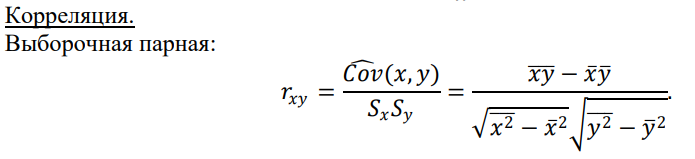

In [ ]:
# Парная корреляция:
cor_x1_y = cor(df[,1], df[,2])
cor_x2_y = cor(df[,1], df[,3])
cor_x3_y = cor(df[,1], df[,4])
cor_x1_x2 = cor(df[,2], df[,3])
cor_x2_x3 = cor(df[,3], df[,4])
cor_x1_x3 = cor(df[,2], df[,4])

In [ ]:
cor_x1_y

[1] 0.7766677

In [ ]:
cor_x2_y

[1] 0.3460165

In [ ]:
cor_x3_y

[1] -0.5740808

Из полученных парных коэффициентов корреляции можно сделать вывод, что наиболее коррелирует с y факторы x1 и x3 (0.777 и -0.574 соответсвенно )  => в дальнейшем будем строить модели именно с этими факторами. 

## Диаграммы рассеяния

In [ ]:
y_p = df[,1]
x1_p = df[,2]
x2_p = df[,3]
x3_p = df[,4]

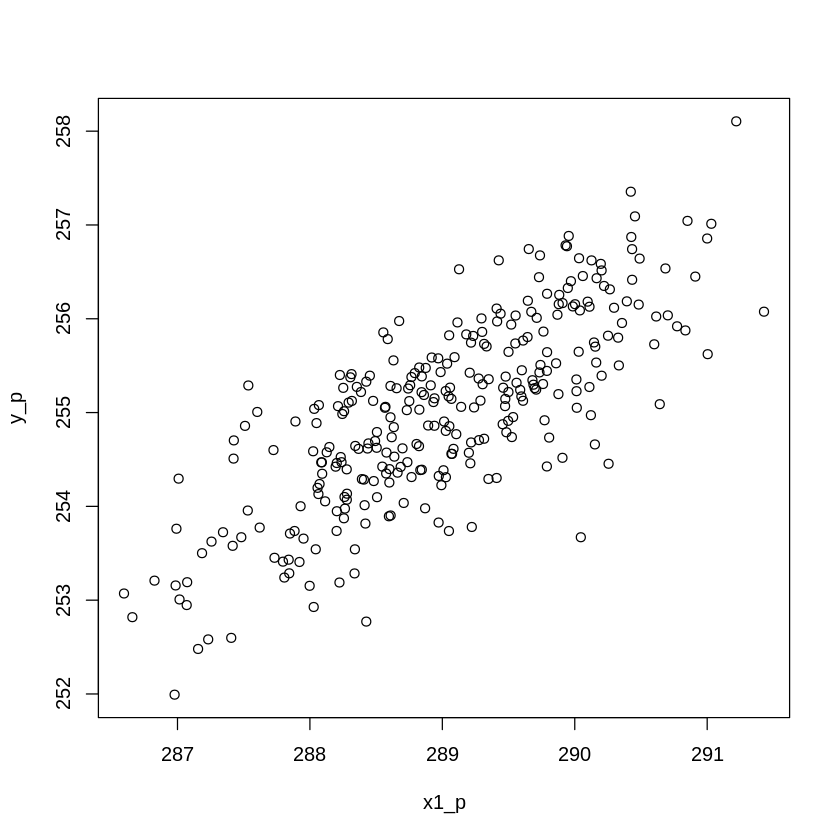

In [ ]:
plot(x1_p, y_p)

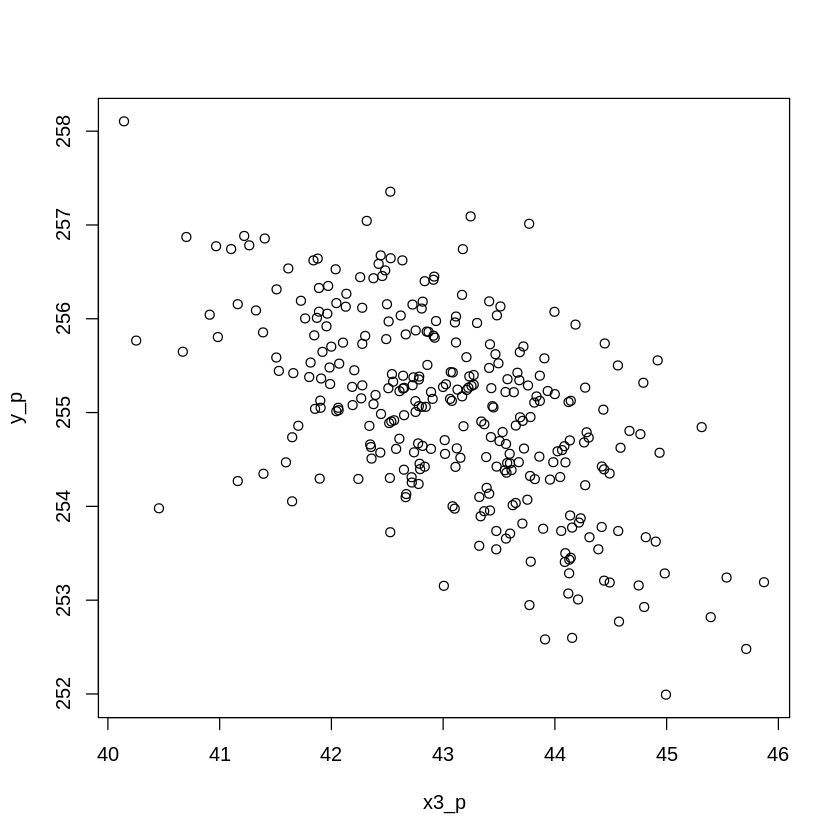

In [ ]:
plot(x3_p, y_p)

Диаграммы рассеяния подверждают мой предыдущий выбор, явно прослеживается линейная зависимость 

**2. Постройте две модели регрессии:**
* Парную 
* Множественную

## Построение модели


### Парная модель y и x1

In [ ]:
model_1 = lm(y ~ x1, data=df)

In [ ]:
summary(model_1)


Call:
lm(formula = y ~ x1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18993 -0.42882 -0.01136  0.50431  1.47542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.36614   11.07158   1.749   0.0813 .  
x1           0.81537    0.03831  21.285   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6321 on 298 degrees of freedom
Multiple R-squared:  0.6032,	Adjusted R-squared:  0.6019 
F-statistic:   453 on 1 and 298 DF,  p-value: < 2.2e-16


Y_hat = 19.36614 + 0.81537 * x1 
       

> (11.07158)    (0.0383)     

> F-statistic: 453

> R-squared (R^2):  0.6032

> Adjusted R-squared (R^2_adj):  0.6019

> Residual standard error (Se): 0.6321

> A_mean = 3.01719716270698 % % (посчитанно ниже)


### Парная модель y и x3

In [ ]:
model_2 = lm(y ~ x3, data=df)

In [ ]:
summary(model_2)


Call:
lm(formula = y ~ x3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.51757 -0.56408  0.00198  0.62789  2.39122 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 279.40174    2.01515   138.7   <2e-16 ***
x3           -0.56615    0.04678   -12.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8217 on 298 degrees of freedom
Multiple R-squared:  0.3296,	Adjusted R-squared:  0.3273 
F-statistic: 146.5 on 1 and 298 DF,  p-value: < 2.2e-16


Y_hat = 279.40174 - 0.56615 * x3 
       
> (2.01515)    (0.04678)     

> F-statistic: 146.5

> R-squared (R^2):  0.3296

> Adjusted R-squared (R^2_adj):  0.3273

> Residual standard error (Se): 0.8217

> A_mean =  3.91278975372459 % (посчитанно ниже)


### Множественная модель y и x1, x3 

In [ ]:
model_3 = lm(y ~ x1 + x3, data=df)

In [ ]:
summary(model_3)


Call:
lm(formula = y ~ x1 + x3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74408 -0.39029  0.00271  0.40312  1.49289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.71927   11.49799   6.151 2.49e-09 ***
x1           0.68349    0.03738  18.283  < 2e-16 ***
x3          -0.30736    0.03512  -8.752  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5646 on 297 degrees of freedom
Multiple R-squared:  0.6846,	Adjusted R-squared:  0.6824 
F-statistic: 322.3 on 2 and 297 DF,  p-value: < 2.2e-16


$$Y_{hat} = 70.71927 + 0.68349 * x1 - 0.30736 * x3 $$
$$        (11.49799)    (0.03738)      (0.03512)$$

---
> F-statistic: 322.3

> R-squared (R^2):  0.6846

> Adjusted R-squared (R^2_adj):  0.6824

> Residual standard error (Se): 0.5646

> A_mean = 2.63668280773602 % (посчитанно ниже)


**3. Оцените качество моделей, используя коэффициент детерминации и среднюю 
относительную ошибку аппроксимации.**

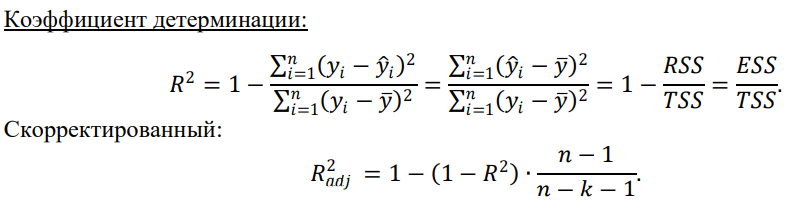

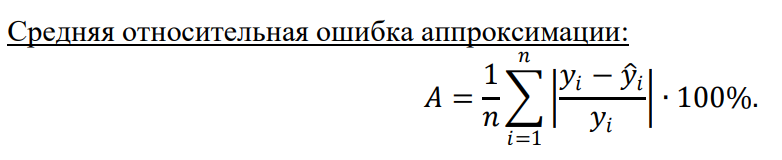

Y ~ x1

In [ ]:
R_2 = 0.6032
R_adj = 0.6019

yi_hat = predict(model_1)

A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean = ', A_mean, ' %' )

[1] "A_mean = 3.01719716270698 %"

Y ~ x3

In [ ]:
R_2 = 0.3296
R_adj = 0.3273

yi_hat = predict(model_2)

A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean = ', A_mean, ' %' )

[1] "A_mean = 3.91278975372459 %"

Y ~ x1 + x3

In [ ]:
R_2 = 0.6846
R_adj = 0.6824

yi_hat = predict(model_3)

A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean = ', A_mean, ' %' )

[1] "A_mean = 2.63668280773602 %"

### $$ Т.к.\; значения\; R^2 \;и\;R^2_{adj}$$ у множественной модели (Y ~ x1 + x3) регресии соответсвенно больше, $$чем\; значения\; R^2\; и\; R^2_{adj}\:$$ у других парных моделей регресии, а также значение средней относительной ошибки аппроксимации у парной регресии больше, чем у множественной, то => модель множественной регресии (от x1 и x3) наиболее точно апроксимирует исходные данные.  

**Вывод: Так как коэфф детерминации и скорректировннаый коэфф детерминации достаточно большие (~0.7), а ср отн ошибка аппроксимации меньше 5%, то качество модели высокое**

**4. Проведите тесты на значимость параметров моделей и моделей в целом.**

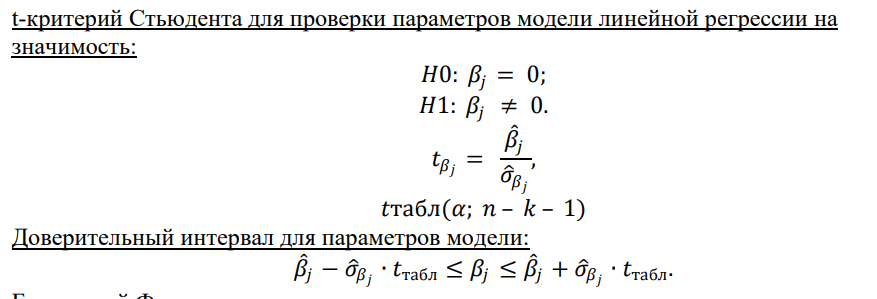

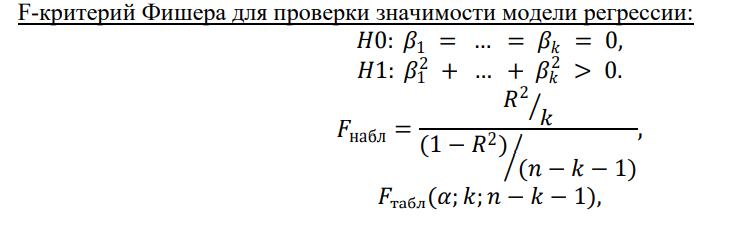

Y ~ x1

In [ ]:
t_b0 = 1.749
t_b1 = 21.285
t_fr = 1.968 # t_табл(0.05/2, 298) - посчитанно в питоне

> |t_b1| > t_табл => гипотеза H0 отвергается => параметр модели значим

> |t_b0| < t_табл => гипотеза H0 не отвергается => параметр модели незначим




In [ ]:
F_stat = 453 # F_набл
F_fr = 3.8728 # F_табл(0.05, 1, 298)

> F_набл > F_табл => гипотеза H0 отвергается => модель значима

Y ~ x3

In [ ]:
t_b0 = 138.7
t_b1 = -12.1
t_fr = 1.968 # t_табл(0.05/2, 298)

> |t_b1|, |t_b0| > t_табл => гипотеза H0 отвергается => параметры модели значимы

In [ ]:
F_stat = 146.5 # F_набл
F_fr = 3.8728 # F_табл(0.05, 1, 298)

> F_набл > F_табл => гипотеза H0 отвергается => модель значима

Y ~ x1 + x3

In [ ]:
t_b0 = 6.151
t_b1 = 18.283
t_b2 = -8.752
t_fr = 1.968 # t_табл(0.05/2, 297)

> |t_b0|, |t_b1|, |t_b2| > t_табл => гипотеза H0 отвергается => параметры модели значимы

In [ ]:
F_stat = 322.3 # F_набл
F_fr = 3.0261 # F_табл(0.05, 2, 297)

> F_набл > F_табл => гипотеза H0 отвергается => модель значима

**5. Рассчитайте коэффициенты бетта, дельта и эластичности.**

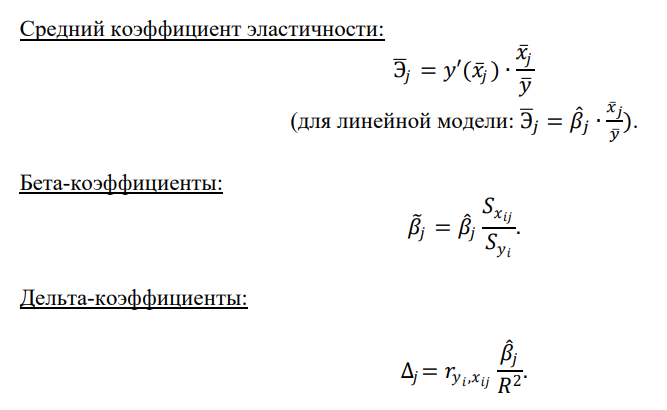

## Y ~ x1

In [ ]:
summary(model_1)


Call:
lm(formula = y ~ x1, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.18993 -0.42882 -0.01136  0.50431  1.47542 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.36614   11.07158   1.749   0.0813 .  
x1           0.81537    0.03831  21.285   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6321 on 298 degrees of freedom
Multiple R-squared:  0.6032,	Adjusted R-squared:  0.6019 
F-statistic:   453 on 1 and 298 DF,  p-value: < 2.2e-16


In [ ]:
E_x1 = 0.81537 * (mean(df[,2])/mean(df[,1])) # Средний коэффициент эластичности
E_x1

[1] 0.9240595

### С увеличением x1 на 1%, Y увеличится на 0.924%

In [ ]:
beta1 = 0.81537 * (sd(df[,2])/sd(df[,1])) # Бета-коэффициент
beta1

[1] 0.7766674

### При изменении x1 на одно СКО, Y изменится на 0.777 своего СКО


In [ ]:
delta_coef_x1 = cor_x1_y*(0.81537/0.6032)
delta_coef_x1

[1] 1.049853

### Дельта коэф показывает среднюю долю влияния соответствующего фактора в совокупном влиянии всех факторов, включённых в модель 

## Y ~ x1 + x3

In [ ]:
summary(model_3)


Call:
lm(formula = y ~ x1 + x3, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.74408 -0.39029  0.00271  0.40312  1.49289 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 70.71927   11.49799   6.151 2.49e-09 ***
x1           0.68349    0.03738  18.283  < 2e-16 ***
x3          -0.30736    0.03512  -8.752  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5646 on 297 degrees of freedom
Multiple R-squared:  0.6846,	Adjusted R-squared:  0.6824 
F-statistic: 322.3 on 2 and 297 DF,  p-value: < 2.2e-16


In [ ]:
E_x1 = 0.68349 * (mean(df[,2])/mean(df[,1])) # Средний коэффициент эластичности
E_x1

[1] 0.7745998

### С увеличением x1 на 1%, Y увеличится на 0.775%

In [ ]:
E_x3 = -0.30736 * (mean(df[,4])/mean(df[,1])) # Средний коэффициент эластичности
E_x3

[1] -0.05190812

### С увеличением x3 на 1%, Y уменьшится на 0.052%

In [ ]:
beta1 = 0.68349 * (sd(df[,2])/sd(df[,1])) # Бета-коэффициент
beta1

[1] 0.6510473

### При изменении x1 на одно СКО, Y изменится на 0.651 своего СКО


In [ ]:
beta3 = -0.30736 * (sd(df[,4])/sd(df[,1])) # Бета-коэффициент
beta3

[1] -0.3116656

### При изменении x3 на одно СКО, Y изменится на -0.312 своего СКО


Delta коэф для x1

In [ ]:
delta_coef_x1 = cor_x1_y*(0.68349/0.6846)
delta_coef_x1

[1] 0.7754084

Delta коэф для x3

In [ ]:
delta_coef_x3 = cor_x3_y*(-0.30736/0.6846)
delta_coef_x3

[1] 0.257741

**x1 оказывает наибольшую долю влияния во множественной моделе регрессии** 

**6. Сравните модели множественной и парной регрессии с помощью соответствующего 
теста. Выберите лучшую.**

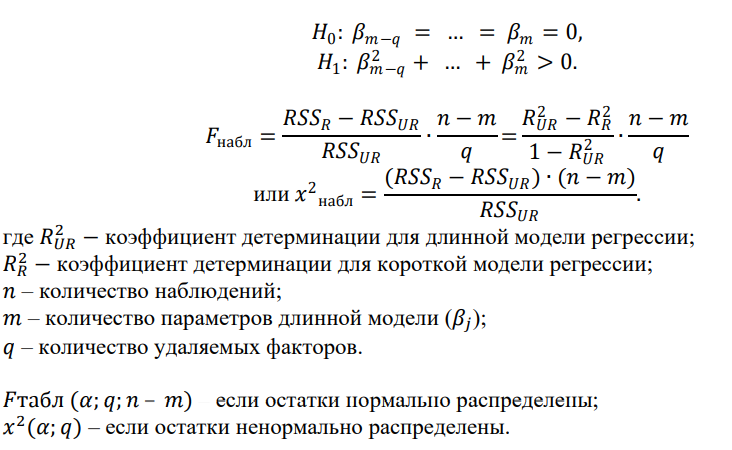

In [ ]:
waldtest(model_1, model_3, test = c("Chisq"))

,Res.Df,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>
1,298,NA,NA,NA
2,297,1,76.59846,2.095031e-18


### Т.к. P_value < alfa (2.095031e-18 < 0.05) => H0 неверна => Предпочтительнее множественная модель регрессии


**7. Выбранную модель проверьте на наличие пропущенных переменных.**

**Используя тест Рамсея, проверим нашу модель (Y ~ x1 + x3)**

Строим вспомогательную модель регрессиии от x1 и x3 

$$ \hat{\hat{y_i}} =a+b_1+x_{1i}+x_{3i} +b_2\hat{y_i}^2 +b_3\hat{y_i}^3$$

$$\hat{y_i} =a+b_1+x_{1i}+x_{3i}$$

---

$$ H_0: b_2=b_3=0 $$

$$ H_1: b_2^2=b_3^2=0 $$


In [ ]:
resettest(model_3, type="regressor")


	RESET test

data:  model_3
RESET = 0.7697, df1 = 4, df2 = 293, p-value = 0.5457


$$ \text{Т.к. } p_v > alfa \text{     (0.5457 > 0.05)} => {H_0} \text{ - верна} => \text{в модели нет пропущенных факторов} $$


8. Рассчитайте параметры парных нелинейных моделей, описывающих зависимости 
𝑦 от 𝑥2:
* А) полином второй степени;
* Б) показательную;
* В) гиперболическую;

### а)

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x2**


In [ ]:
model_x2_2 = lm(y ~ x2^2, data=df)

In [ ]:
summary(model_x2_2)


Call:
lm(formula = y ~ x2^2, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.60239 -0.70036  0.03359  0.63932  2.95469 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 242.32313    1.99485 121.474  < 2e-16 ***
x2            0.34280    0.05384   6.366  7.3e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9416 on 298 degrees of freedom
Multiple R-squared:  0.1197,	Adjusted R-squared:  0.1168 
F-statistic: 40.53 on 1 and 298 DF,  p-value: 7.299e-10


$$ Y_{hat} = 242.32313*{x^2} +  0.34280$$

In [ ]:
yi_hat = predict(model_x2_2)

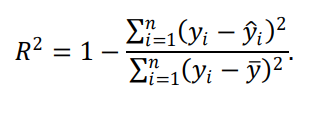

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.1197274

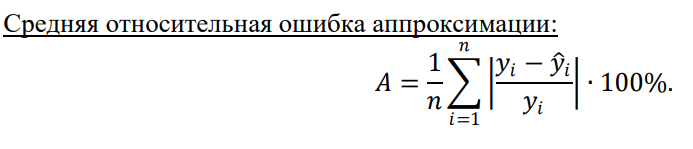

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  4.46982029924153 %"

### б)

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x2**


In [ ]:
model_x2_log = lm(log(y) ~ x2, data=df)

In [ ]:
summary(model_x2_log)


Call:
lm(formula = log(y) ~ x2, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0102666 -0.0027421  0.0001378  0.0025121  0.0115208 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.4915058  0.0078245  701.84  < 2e-16 ***
x2          0.0013453  0.0002112    6.37 7.15e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.003693 on 298 degrees of freedom
Multiple R-squared:  0.1198,	Adjusted R-squared:  0.1169 
F-statistic: 40.58 on 1 and 298 DF,  p-value: 7.154e-10


In [ ]:
a = exp(1)**(5.4915058) 
a

[1] 242.6223

In [ ]:
b = exp(1)**(0.0013453)
b 

[1] 1.001346

$$ Y_{hat} = 242.622272549019 * 1.00134620532198^{x}$$

In [ ]:
yi_hat = exp(1)**predict(model_x2_log)

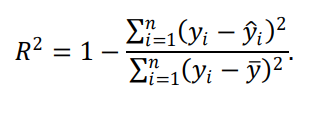

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.1197156

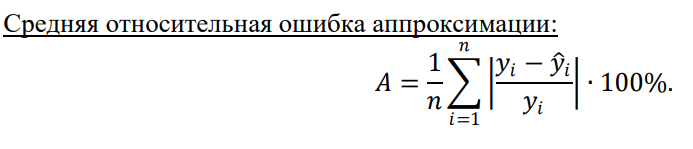

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  4.47008333181328 %"

### в)

**Найдём все параметры для нелинейных моделей, описывающих зависимости y от x2**


In [ ]:
model_x2_hyp = lm(1/y ~ x2, data=df)

In [ ]:
summary(model_x2_hyp)


Call:
lm(formula = 1/y ~ x2, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-4.492e-05 -9.871e-06 -5.640e-07  1.074e-05  4.050e-05 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.117e-03  3.069e-05 134.141  < 2e-16 ***
x2          -5.280e-06  8.284e-07  -6.373 7.01e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.449e-05 on 298 degrees of freedom
Multiple R-squared:   0.12,	Adjusted R-squared:  0.117 
F-statistic: 40.62 on 1 and 298 DF,  p-value: 7.015e-10


$$ Y_{hat} = 1 / ({4.117*10^{-3}}*{x} -5.280*10^{-6})$$

In [ ]:
yi_hat = 1/predict(model_x2_hyp)

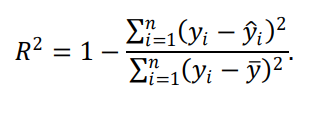

In [ ]:
R_2 = 1 - (sum((y_p - yi_hat)**2))/(sum((y_p - mean(y_p))**2)) 
R_2

[1] 0.1196973

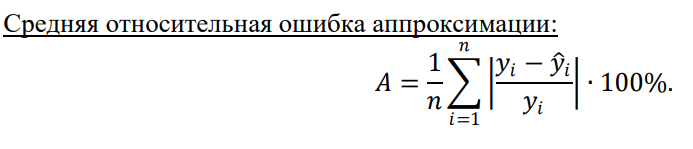

In [ ]:
A_mean = 1/20 * (sum(abs((y_p - yi_hat) / y_p))) * 100
paste0('A_mean  =  ', A_mean, ' %' )

[1] "A_mean  =  4.47034670529896 %"